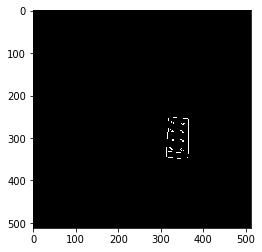

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
import math
import json
import re

%matplotlib inline


expr = re.compile("([-]?[0-9]*\.[0-9]{4})")


datadir = "/Users/will/Desktop/brick_oneofeach/"
img0 = cv2.imread('wing2.png',0)
img = cv2.imread(datadir + '2_brick_a.png')


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)


edged = cv2.Canny(gray, 30, 200)
'''
cv2.imshow('Edges', edged)
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''
plt.imshow(edged,cmap='gray')
plt.show()

kernel = np.ones((2,2), np.uint8) 
edged = cv2.dilate(edged, kernel, iterations=2) 


cv2.imshow('Dilated', edged)

'''
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


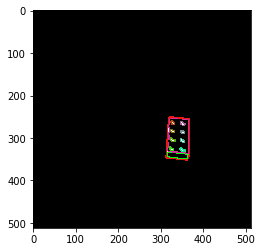

Found contour of length: 119.21320307254791
Found contour of length: 39.31370830535889
Found contour of length: 29.899494647979736
Found contour of length: 29.313708305358887
Found contour of length: 35.3137081861496
Found contour of length: 28.727921724319458
Found contour of length: 27.899494528770447
Found contour of length: 34.72792172431946
Found contour of length: 29.899494767189026
Found contour of length: 265.11269783973694
Found contour of length: 299.11269783973694


In [3]:
img1 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)

num = len(contours)

for i in range(num):
    one = math.floor(i/num * 255)
    other = 255 - one
    b = 150 if i % 2 else 20
    cv2.drawContours(img1, contours, i, (one, other, b), 2)

 
plt.imshow(img1)
plt.show()

for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    print("Found contour of length: " + str(perimeter))

In [106]:
t = contours[-2]
t2 = contours[0]

In [116]:
approx = cv2.approxPolyDP(t,0.05*cv2.arcLength(t,True),True)
approx2 = cv2.approxPolyDP(t2,0.05*cv2.arcLength(t2,True),True)

In [117]:
def get_pair(index, points):
    
    num = len(points)
    for i in range(num):
        j = i + 1 if i < num - 1 else 0
        
        if i == index:
            return np.array([points[i], points[j]])
    return None


def get_slopes(points):
    num = len(points)
    slopes = []
    
    for i in range(num):

        j = i + 1 if i < num - 1 else 0
        
        diff = points[j] - points[i]
        
        if diff[1] == 0:
            diff[1] += 1
            
        slope = diff[0]/diff[1]
        slopes.append(tuple([i, slope]))
    
    slopes.sort(key=lambda x: x[1])
    return slopes


def get_parallel_pair(slopes):
    
    num = len(slopes)
    
    for i in range(num):
        j = i + 1 if i < num - 1 else 0
        
        cur0 = slopes[0][1]
        cur1 = slopes[1][1]
        
        if abs(cur1 - cur0) < .5:
            return tuple([cur0[0], cur1[0]])
        
    return None
        
    
    
def edge_march(edge, studs):
    return None
    

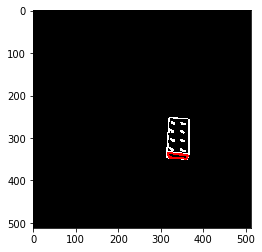

In [118]:
img2 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
cv2.drawContours(img2, [approx2], 0, (255, 0, 0), 3)

plt.imshow(img2)
plt.show()

In [140]:
approx = np.reshape(approx, (-1,2))

slopes = get_slopes(approx)

approx2 = np.reshape(approx2, (-1,2))
slopes2 = get_slopes(approx2)
approx

array([[322, 253],
       [365, 258],
       [364, 336],
       [315, 329]], dtype=int32)

In [141]:
line = get_pair(1,approx)
print(line)

[[365 258]
 [364 336]]


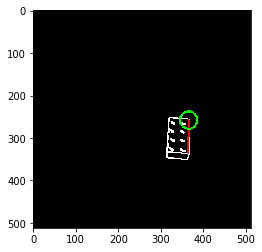

In [142]:
img2 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
cv2.drawContours(img2, [line], 0, (255, 0, 0), 3)

cv2.circle(img2, (365, 258), 20, (0, 255, 0), 3)

plt.imshow(img2)
plt.show()

In [144]:
ocoordscw = np.array([(-0.64, -0.32, 0), (-0.64, 0.32, 0), (0.64, 0.32, 0), (0.64, 0.32, -0.384)], dtype = "double")
#ocoordscw = np.array([(-0.64, 0, -0.32), (-0.64, 0, 0.32), (0.64, 0, 0.32), (0.64, 0, -0.32)], dtype = "double")
scoordscw = []

for t in approx[0:3]:
    scoordscw.append(tuple(t))

scoordscw.append(tuple([360, 349]))  
scoordscw = np.array(scoordscw, dtype = "double")

def matrix_from_string(matstring):

    matches = expr.findall(matstring)

    nums = np.asarray(list(map(lambda x: float(x), matches)), dtype=np.float32)
    nums = np.reshape(nums, (4,4))

    return nums
    
def get_object_matrices(filename):

    data = {}

    with open(filename) as json_file:
        data = json.load(json_file)

    for key in data:
        data[key] = matrix_from_string(data[key])

    return data

pmat = get_object_matrices(datadir + "mats/{}.txt".format(2))["Projection"]
f = pmat[0][0]
ocoordscw

array([[-0.64 , -0.32 ,  0.   ],
       [-0.64 ,  0.32 ,  0.   ],
       [ 0.64 ,  0.32 ,  0.   ],
       [ 0.64 ,  0.32 , -0.384]])

In [145]:
cmat = np.array([  [f, 0, 256],  [0, f, 256], [0, 0, 1]  ], dtype = "double")

In [160]:
cmat

array([[  2.1875,   0.    , 256.    ],
       [  0.    ,   2.1875, 256.    ],
       [  0.    ,   0.    ,   1.    ]])

In [166]:
dist_coeffs = np.zeros((4,1))

r = cv2.solvePnPRansac(ocoordscw, scoordscw, cmat, dist_coeffs, flags=(cv2.cv2.SOLVEPNP_ITERATIVE))
r

(True, array([[-2.04730661],
        [-2.37955647],
        [ 0.01116348]]), array([[1.53601249],
        [0.62080848],
        [0.03958699]]), array([[0],
        [1],
        [2],
        [3]], dtype=int32))

In [167]:
rvec = r[1]
tvec = r[2]

In [168]:
(pt, jac) = cv2.projectPoints(np.array([(0,0.0,0.0),(1.0, 0.0, 0.0),(0.0, 1.0, 0.0),(0.0, 0.0, 1.0)]), rvec, tvec, cmat, dist_coeffs)

In [169]:
pt = pt.astype(int)
pt

array([[[340, 290]],

       [[338, 351]],

       [[425, 307]],

       [[252, 254]]])

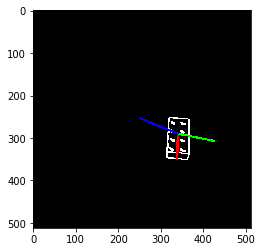

In [170]:
img3 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
lines = [(255,0,0), (0,255,0), (0,0,255)]
#cv2.circle(img3, tuple(pt[0][0]), 20, (0, 0, 255), 3)
i = 0
for point in pt[1:4]:
    o = pt[0][0]
    cv2.line(img3, tuple(o), tuple(point[0]), lines[i], 3)
    i+=1
plt.imshow(img3)
plt.show()